# 4. NPT
First, we do a NPT equilibration, like a real experimental condition, with fixed atoms, constant pressure and temperature.

## 4.1 Copy files

In [4]:
from pathlib import Path
from shutil import copy
cwd = Path.cwd()

source = cwd.parent/'3. Deform'
copy(source/'data.new.lmp', cwd/'data.lmp')
copy(source/'in.spe', cwd)
copy(source/'CH.airebo', cwd)

'c:\\Users\\fitbe\\OneDrive\\Desktop\\AO Tutorial\\LAMMPS\\4. NPT\\CH.airebo'

## 4.2 Input file
- To determine the equilibration time, see if potential energy and density are converged.

In [2]:
%%writefile in.lmp
#---------- Initization ----------#
units metal
dimension 3
boundary p p p
atom_style charge

#---------- structure ----------#
read_data data.lmp

#---------- Force Field ----------#
pair_style airebo 3.0
pair_coeff * * CH.airebo C H

#---------- Simulation ----------#
# Timestep
timestep 0.0005              # Timestep in ps
variable ttotal equal 10     # Total simulation time in ps
variable thermo equal 100    # Number of thermo data
variable dump equal 100      # Number of dump frames
variable Ntotal equal ${ttotal}/dt
variable Nthermo equal ${Ntotal}/${thermo}
variable Ndump equal ${Ntotal}/${dump}

# Variables
variable random equal 12345
variable Tset equal 300
variable Tdamp equal 100*dt
variable Pset equal 1
variable Pdamp equal 1000*dt

# Fix
velocity all create ${Tset} ${random}
fix 1 all npt temp ${Tset} ${Tset} ${Tdamp} iso ${Pset} ${Pset} ${Pdamp}

# Thermo
thermo ${Nthermo}
thermo_style custom step time temp pe press lz density

# Dump
dump 1 all custom ${Ndump} dump.lmp id type element mass x y z vx vy vz
dump_modify 1 element C H

run ${Ntotal}

#---------- End ----------#
write_data data.new.lmp

Overwriting in.lmp


## 4.3. Run LAMMPS

In [3]:
!lmp -i in.lmp -l log.lmp

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\fitbe\AppData\Local\LAMMPS 64-bit 2Aug2023 with GUI\plugins
Reading data file ...
  orthogonal box = (0 0 0) to (28.63 28.63 28.63)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  1860 atoms
  reading velocities ...
  1860 velocities
  read_data CPU = 0.026 seconds
Reading airebo potential file CH.airebo with DATE: 2011-10-25
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 12.2
  ghost atom cutoff = 12.2
  binsize = 6.1, bins = 5 5 5
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair airebo, perpetual
      attributes: full, newton on, ghost
      pair build: full/bin/ghost
      stencil: full/ghost/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
 

## 4.4. Visualize the structure
Open the "dump.lmp" using OVITO software.

## 4.5. Log file

In [4]:
# Import packages
from lammps.formats import LogFile
import pandas as pd

C:\Users\fitbe\AppData\Local\Temp\ipykernel_16260\3674864415.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Load log file
file = LogFile(filename='log.lmp')

# The file contains a list of runs and errors. We only have one run.
# Each run is a dictionary with thermo fields as keys, storing the values over time.
run = file.runs[0]

# Convert to pandas DataFrame
log = pd.DataFrame(run)

# Print
log

Step  Time       Temp     PotEng        Press         Lz   Density
0        0.0   0.0  300.00000 -7766.4425  3752.826800  28.630000  0.599788
1      200.0   0.1  295.64361 -7759.1292   157.252580  28.874195  0.584699
2      400.0   0.2  311.00800 -7760.5975  2105.812300  29.130749  0.569386
3      600.0   0.3  294.38395 -7759.3674 -1390.753500  29.519509  0.547185
4      800.0   0.4  310.31805 -7758.3571  2186.073700  29.679052  0.538408
..       ...   ...        ...        ...          ...        ...       ...
96   19200.0   9.6  293.67988 -7761.6714   315.241980  28.113633  0.633448
97   19400.0   9.7  300.19281 -7758.2868  2060.616500  28.072977  0.636204
98   19600.0   9.8  299.94746 -7759.8673 -1191.780100  28.064589  0.636775
99   19800.0   9.9  299.26066 -7763.0956   -74.472615  28.030422  0.639106
100  20000.0  10.0  301.72477 -7758.2564   564.805010  28.047698  0.637926

[101 rows x 7 columns]

In [6]:
# Plot the potential energy
log.plot(x='Time', y='PotEng', xlabel='Time (ps)', ylabel='Potential Energy (eV)', legend=False)

<Axes: xlabel='Time (ps)', ylabel='Potential Energy (eV)'>

<Axes: xlabel='Time (ps)', ylabel='Density (g/cm^3)'>

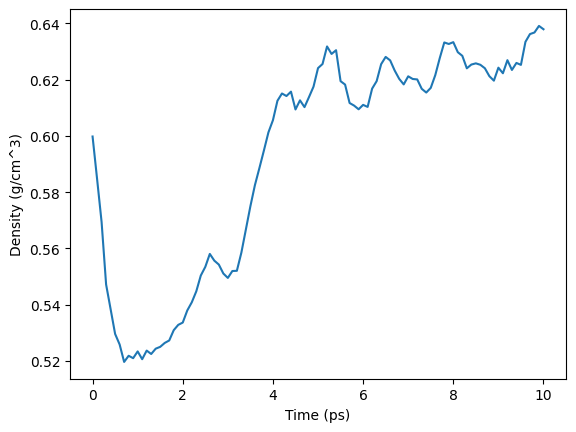

In [7]:
# Plot the density
log.plot(x='Time', y='Density', xlabel='Time (ps)', ylabel='Density (g/cm^3)', legend=False)

## 4.6. Species

In [5]:
!lmp -i in.spe -l log.spe

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\fitbe\AppData\Local\LAMMPS 64-bit 2Aug2023 with GUI\plugins
Reading data file ...
  orthogonal box = (0.29115105 0.29115105 0.29115105) to (28.338849 28.338849 28.338849)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  1860 atoms
  reading velocities ...
  1860 velocities
  read_data CPU = 0.014 seconds
Reading potential file ffield.reax.cho with DATE: 2011-02-18

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- pair reaxff command: doi:10.1016/j.parco.2011.08.005
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list

In [6]:
!type spe.spe

#  Timestep    No_Moles    No_Specs      C20H42
          1          30           1          30
